## 서울시 화재사고 현황분석 대시보드 제작 전 EDA
- 서울시 화재발생 현황 (구별) 통계 csv 파일 사용

In [ ]:
# 폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 데이터 불러오기

In [ ]:
# 데이터 불러오기
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/서울시 화재발생 현황 (2017~2022)/서울시_화재발생_현황(구별)2022.csv'

df = pd.read_csv(file_path)

df.head(10)

Mounted at /content/drive


,지역구,화재총합(건),실화(건),방화(건),기타(건),소실동수(동수),이재가구수(가구),소실면적(m²),피해액총합(천원),부동산피해(천원),...,인명피해_남(명),인명피해_여(명),사망총합(명),사망_남(명),사망_여(명),부상총합(명),부상_남(명),부상_여(명),이재민수(명),구조인원(명)
0,종로구,191,159,2.0,30,2.0,1.0,501,272206,151976,...,6,6,2.0,1.0,1.0,10,5,5,3.0,18
1,중구,190,155,9.0,26,27.0,5.0,956,2401154,551299,...,19,5,2.0,2.0,NaN,22,17,5,6.0,6
2,용산구,207,173,9.0,25,6.0,11.0,390,270752,96719,...,9,1,2.0,2.0,NaN,8,7,1,17.0,8
3,성동구,215,186,5.0,24,34.0,3.0,1997,1085583,313315,...,6,5,1.0,NaN,1.0,10,6,4,4.0,22
4,광진구,145,131,2.0,12,15.0,4.0,419,484286,172347,...,4,3,NaN,NaN,NaN,7,4,3,8.0,18
5,동대문구,173,150,2.0,21,11.0,6.0,626,802227,264662,...,8,6,2.0,NaN,2.0,12,8,4,19.0,54
6,중랑구,188,162,9.0,17,NaN,NaN,933,377343,180328,...,12,11,3.0,2.0,1.0,20,10,10,NaN,8
7,성북구,158,135,6.0,17,20.0,5.0,837,338543,131717,...,6,8,1.0,1.0,NaN,13,5,8,9.0,4
8,강북구,155,130,7.0,18,36.0,8.0,585,333463,178589,...,8,6,1.0,1.0,NaN,13,7,6,11.0,16
9,도봉구,159,138,4.0,17,14.0,2.0,803,279020,156102,...,7,6,2.0,2.0,NaN,11,5,6,6.0,7


### 데이터 구조확인

In [ ]:
df.shape

(26, 23)

In [ ]:
df.columns

Index(['지역구', '화재총합(건)', '실화(건)', '방화(건)', '기타(건)', '소실동수(동수)', '이재가구수(가구)',
       '소실면적(m²)', '피해액총합(천원)', '부동산피해(천원)', '동산피해(천원)', '재산피해경감액(천원)',
       '인명피해합(명)', '인명피해_남(명)', '인명피해_여(명)', '사망총합(명)', '사망_남(명)', '사망_여(명)',
       '부상총합(명)', '부상_남(명)', '부상_여(명)', '이재민수(명)', '구조인원(명)'],
      dtype='object')

In [ ]:
# 첫 열의 값들을 인덱스로
df = df.set_index(df.columns[0])
df.head(3)

,화재총합(건),실화(건),방화(건),기타(건),소실동수(동수),이재가구수(가구),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),...,인명피해_남(명),인명피해_여(명),사망총합(명),사망_남(명),사망_여(명),부상총합(명),부상_남(명),부상_여(명),이재민수(명),구조인원(명)
지역구,,,,,,,,,,,,,,,,,,,,,
종로구,191,159,2.0,30,2.0,1.0,501,272206,151976,120230,...,6,6,2.0,1.0,1.0,10,5,5,3.0,18
중구,190,155,9.0,26,27.0,5.0,956,2401154,551299,1849855,...,19,5,2.0,2.0,NaN,22,17,5,6.0,6
용산구,207,173,9.0,25,6.0,11.0,390,270752,96719,174033,...,9,1,2.0,2.0,NaN,8,7,1,17.0,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 종로구 to 서울시총합
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   화재총합(건)      26 non-null     int64  
 1   실화(건)        26 non-null     int64  
 2   방화(건)        25 non-null     float64
 3   기타(건)        26 non-null     int64  
 4   소실동수(동수)     24 non-null     float64
 5   이재가구수(가구)    25 non-null     float64
 6   소실면적(m²)     26 non-null     int64  
 7   피해액총합(천원)    26 non-null     int64  
 8   부동산피해(천원)    26 non-null     int64  
 9   동산피해(천원)     26 non-null     int64  
 10  재산피해경감액(천원)  26 non-null     int64  
 11  인명피해합(명)     26 non-null     int64  
 12  인명피해_남(명)    26 non-null     int64  
 13  인명피해_여(명)    26 non-null     int64  
 14  사망총합(명)      21 non-null     float64
 15  사망_남(명)      17 non-null     float64
 16  사망_여(명)      10 non-null     float64
 17  부상총합(명)      26 non-null     int64  
 18  부상_남(명)      26 non-null     int64  
 19  부상_여(명)   

In [ ]:
# 결측치 확인
missing_value = df.isnull().sum()
print(missing_value)

화재총합(건)         0
실화(건)           0
방화(건)           1
기타(건)           0
소실동수(동수)        2
이재가구수(가구)       1
소실면적(m²)        0
피해액총합(천원)       0
부동산피해(천원)       0
동산피해(천원)        0
재산피해경감액(천원)     0
인명피해합(명)        0
인명피해_남(명)       0
인명피해_여(명)       0
사망총합(명)         5
사망_남(명)         9
사망_여(명)        16
부상총합(명)         0
부상_남(명)         0
부상_여(명)         0
이재민수(명)         1
구조인원(명)         0
dtype: int64


In [ ]:
# 서울 열린데이터광장에 전화해본 결과 결측치는 구하지못한 데이터가 아니라 0이라는 것을 알아냈다.
# 결측치 0으로 채우기
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 종로구 to 서울시총합
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   화재총합(건)      26 non-null     int64  
 1   실화(건)        26 non-null     int64  
 2   방화(건)        26 non-null     float64
 3   기타(건)        26 non-null     int64  
 4   소실동수(동수)     26 non-null     float64
 5   이재가구수(가구)    26 non-null     float64
 6   소실면적(m²)     26 non-null     int64  
 7   피해액총합(천원)    26 non-null     int64  
 8   부동산피해(천원)    26 non-null     int64  
 9   동산피해(천원)     26 non-null     int64  
 10  재산피해경감액(천원)  26 non-null     int64  
 11  인명피해합(명)     26 non-null     int64  
 12  인명피해_남(명)    26 non-null     int64  
 13  인명피해_여(명)    26 non-null     int64  
 14  사망총합(명)      26 non-null     float64
 15  사망_남(명)      26 non-null     float64
 16  사망_여(명)      26 non-null     float64
 17  부상총합(명)      26 non-null     int64  
 18  부상_남(명)      26 non-null     int64  
 19  부상_여(명)   

In [ ]:
print(df.index)

Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구', '서울시총합'],
      dtype='object', name='지역구')


In [ ]:
# 주요 변수 시각화 : 화재총합 / 소실면적(m²) / 피해액총합(천원) / 인명피해합(명) / 사망총합(명) / 구조인원(명)
cols_index = [0,6,7,11,14,21]
cols_name = list(df.columns[cols_index])
cols_name

['화재총합(건)', '소실면적(m²)', '피해액총합(천원)', '인명피해합(명)', '사망총합(명)', '구조인원(명)']

In [ ]:
# 시각화이해를 돕기 위해 마지막 인덱스인 '서울시총합' 삭제, 마지막 값이 월등히 크기 때문
df_new = df.drop(df.tail(1).index)
print(df_new.index)

Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object', name='지역구')


## 상관관계 분석

In [ ]:
df_new.head(3)

,화재총합(건),실화(건),방화(건),기타(건),소실동수(동수),이재가구수(가구),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),...,인명피해_남(명),인명피해_여(명),사망총합(명),사망_남(명),사망_여(명),부상총합(명),부상_남(명),부상_여(명),이재민수(명),구조인원(명)
지역구,,,,,,,,,,,,,,,,,,,,,
종로구,191,159,2.0,30,2.0,1.0,501,272206,151976,120230,...,6,6,2.0,1.0,1.0,10,5,5,3.0,18
중구,190,155,9.0,26,27.0,5.0,956,2401154,551299,1849855,...,19,5,2.0,2.0,0.0,22,17,5,6.0,6
용산구,207,173,9.0,25,6.0,11.0,390,270752,96719,174033,...,9,1,2.0,2.0,0.0,8,7,1,17.0,8


In [ ]:
df_new.shape

(25, 22)

In [ ]:
df_new.columns

Index(['화재총합(건)', '실화(건)', '방화(건)', '기타(건)', '소실동수(동수)', '이재가구수(가구)',
       '소실면적(m²)', '피해액총합(천원)', '부동산피해(천원)', '동산피해(천원)', '재산피해경감액(천원)',
       '인명피해합(명)', '인명피해_남(명)', '인명피해_여(명)', '사망총합(명)', '사망_남(명)', '사망_여(명)',
       '부상총합(명)', '부상_남(명)', '부상_여(명)', '이재민수(명)', '구조인원(명)'],
      dtype='object')

In [ ]:
# 상관관계 분석을 위해 특정 변수만 사용. 그 이유는 ex 부동산&동산 피해액과 피해액총합은 당연히 강한 상관관계가 있고, 부상(남)&부상(여)와 부상총합 은 당연히 강한 상관관계가 있기 마련인데,
# 이런 당연한 상관관계들로 인해 히트맵을 한눈에 이해하는데 방해요소라고 생각했기 때문이다.
df_corr = df_new[['화재총합(건)','소실면적(m²)','피해액총합(천원)','재산피해경감액(천원)','인명피해합(명)','이재민수(명)','구조인원(명)']]
df_corr.head(3)

,화재총합(건),소실면적(m²),피해액총합(천원),재산피해경감액(천원),인명피해합(명),이재민수(명),구조인원(명)
지역구,,,,,,,
종로구,191,501,272206,19510470,12,3.0,18
중구,190,956,2401154,14502237,24,6.0,6
용산구,207,390,270752,3893566,10,17.0,8


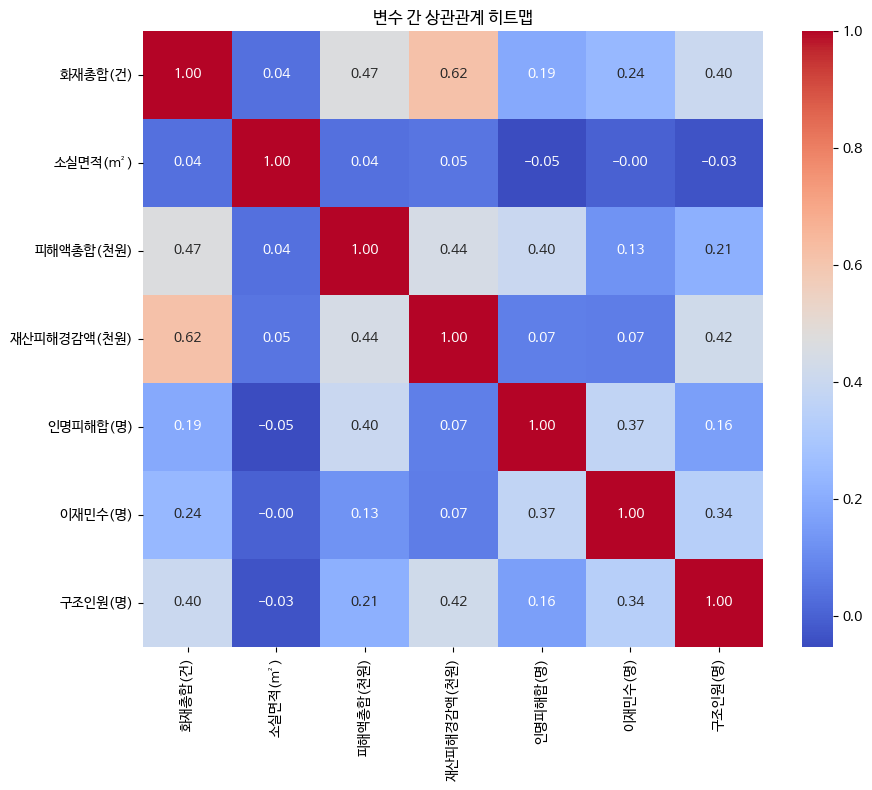

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,8))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('변수 간 상관관계 히트맵')
plt.show()

In [ ]:
df_new.shape

(25, 22)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


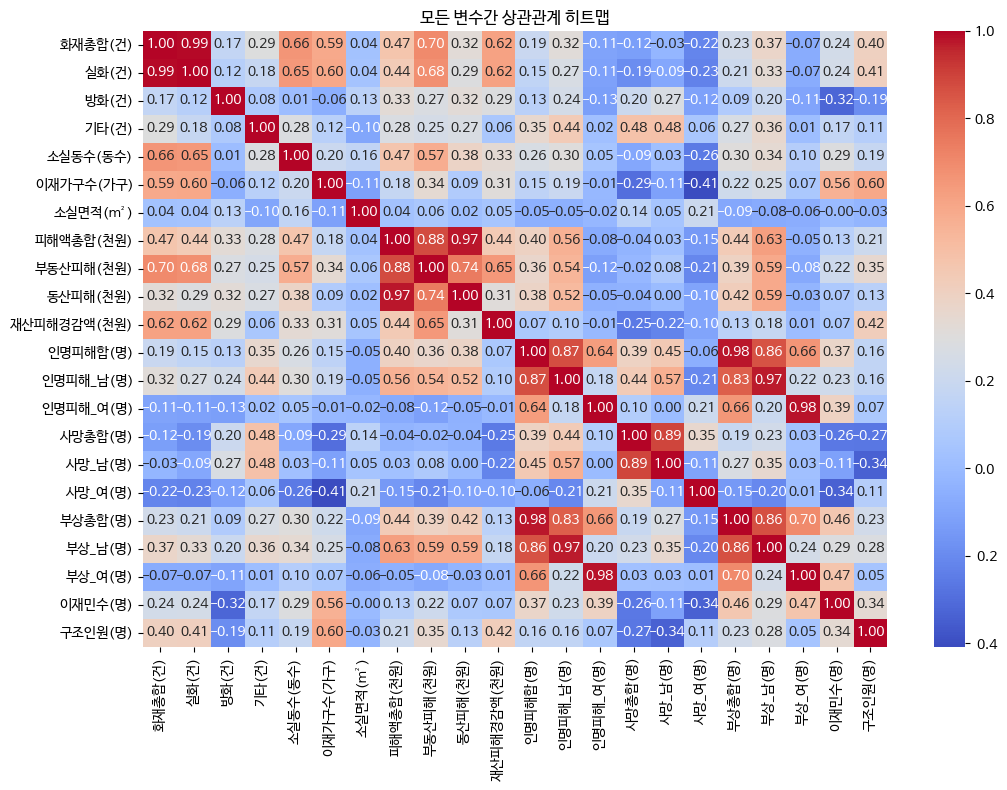

In [ ]:
# 줄인 변수들로는 상관관계에 대한 해답을 찾을 수 없어 보인다. 당연히 화재총합 건수가 올라갈수록 화재피해에 대한 경감액은 오르기 마련이다.
# 변수를 줄이지 말고 다시 correlation matrix를 돌려보자 의미가있는 상관관계 파악을 한눈에 하는건 어렵게 되겠지만
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12,8))
correlation_matrix2 = df_new.corr()
sns.heatmap(correlation_matrix2,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('모든 변수간 상관관계 히트맵')
plt.show()

### 상관관계 분석을 통한 의미 도출
- 프로젝트에 사용될 의미있는 변수조합을 찾을 수 없다. 예를들어, 그나마 상관성이 있는(0.68) 실화건수와 부동산피해금액은 방화건수와 부동산피해금액의 상관관계보다 높은데, 이는 당연히 방화 건수보다 실화 건수가 월등히 많을 것이므로 실화 건수의 증가가 부동산피해금액 상승에 영향을 더 많이 주는 것이다.
- 결론 : 위와 같이, 이 데이터의 변수들간의 상관관계로는
우리팀의 프로젝트 주제에 맞는 상관성(=서울시 화재사고 취약지를 찾는데 도움이 될만한 상관관계)을 찾기가 어려움으로 대시보드 첫페이지(서울시 화재사고 현황 분석)에 메인으로 쓰일 데이터로 사용이 불가하다.
- 따라서 시각화 그래프라도 몇 개 뽑아서 대시보드에 붙여넣는 용도로만 사용하고, 다른 공공데이터를 찾아보아야 할 것이다.

## 시각화

### 화재총합/ 실화,방화 건수

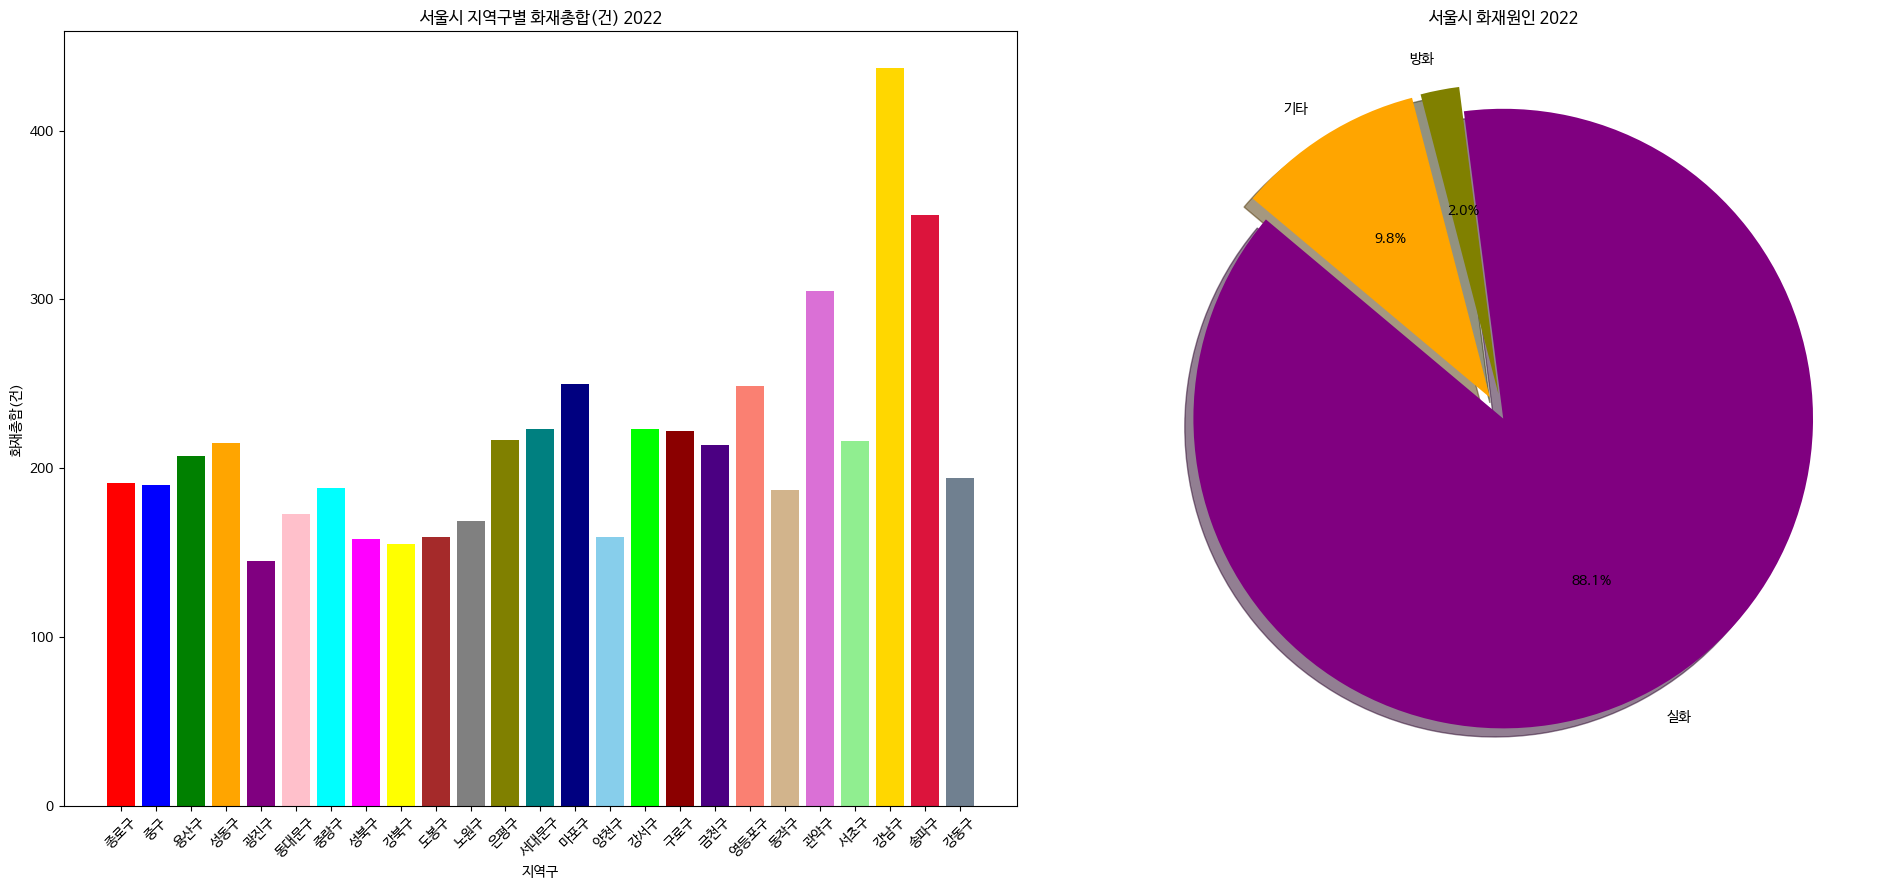

In [ ]:
# 화재총합 / 실화,방화 건수
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#1
labels = df_new.index
values = df_new['화재총합(건)']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'yellow', 'brown', 'gray', 'olive', 'teal', 'navy', 'skyblue', 'lime', 'darkred', 'indigo', 'salmon', 'tan', 'orchid', 'lightgreen', 'gold', 'crimson', 'slategray']

#2
sizes = [df_new['실화(건)'].sum(),df_new['방화(건)'].sum(),df_new['기타(건)'].sum()]
labels2 = ['실화','방화','기타']
colors2 = ['purple','olive','orange']
explode = (0,0.08,0.08)

#1
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
for i, (label,value) in enumerate(zip(labels,values)):
  plt.bar(label,value,color=colors[i])
plt.title('서울시 지역구별 화재총합(건) 2022')
plt.xlabel('지역구')
plt.ylabel('화재총합(건)')
plt.xticks(rotation=45)

#2
plt.subplot(1,2,2)
plt.pie(sizes,labels=labels2,explode=explode,colors=colors2,autopct='%1.1f%%',startangle=140,shadow=True)
plt.title('서울시 화재원인 2022')
plt.tight_layout()
plt.show()

### 소실면적(m²)

In [ ]:
# '소실면적(m²)' 서울시 지도로 시각화할 예정/ 면적별로 지역구를 색칠/
import pandas as pd
import numpy as np
import folium
import json

In [ ]:
df_loss = df_new['소실면적(m²)']
df_loss = df_loss.reset_index()
df_loss

,지역구,소실면적(m²)
0,종로구,501
1,중구,956
2,용산구,390
3,성동구,1997
4,광진구,419
5,동대문구,626
6,중랑구,933
7,성북구,837
8,강북구,585
9,도봉구,803


In [ ]:
df_loss.columns

Index(['지역구', '소실면적(m²)'], dtype='object')

In [ ]:
df_loss.rename(columns={'지역구':'자치구'},inplace=True)
df_loss.columns

Index(['자치구', '소실면적(m²)'], dtype='object')

In [ ]:
import geopandas as gpd
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/'

# 서울 구별 경계를 포함한 GeoDataFrame 로드
seoul_districts = gpd.read_file(DATA_PATH + '구경계_geo.shp')

In [ ]:
merged_data = seoul_districts.merge(df_loss, left_on='구', right_on='자치구')

In [ ]:
import folium
import geopandas as gpd

# 서울시 중심부의 위도와 경도로 지도 초기화
seoul_map = folium.Map(location=[37.5642135, 127.0016985], zoom_state = 11)

#Choropleth 레이어 추가
choropleth = folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['자치구', '소실면적(m²)'],
    key_on='feature.properties.자치구',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='소실면적(m²)',
    bins=25,
    show_legend=False
).add_to(seoul_map)

# 툴팁 추가 (마우스 오버시 구 이름 표시)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['자치구'], labels=False)
)

# 맵 표시
seoul_map

## 피해액총합(천원)

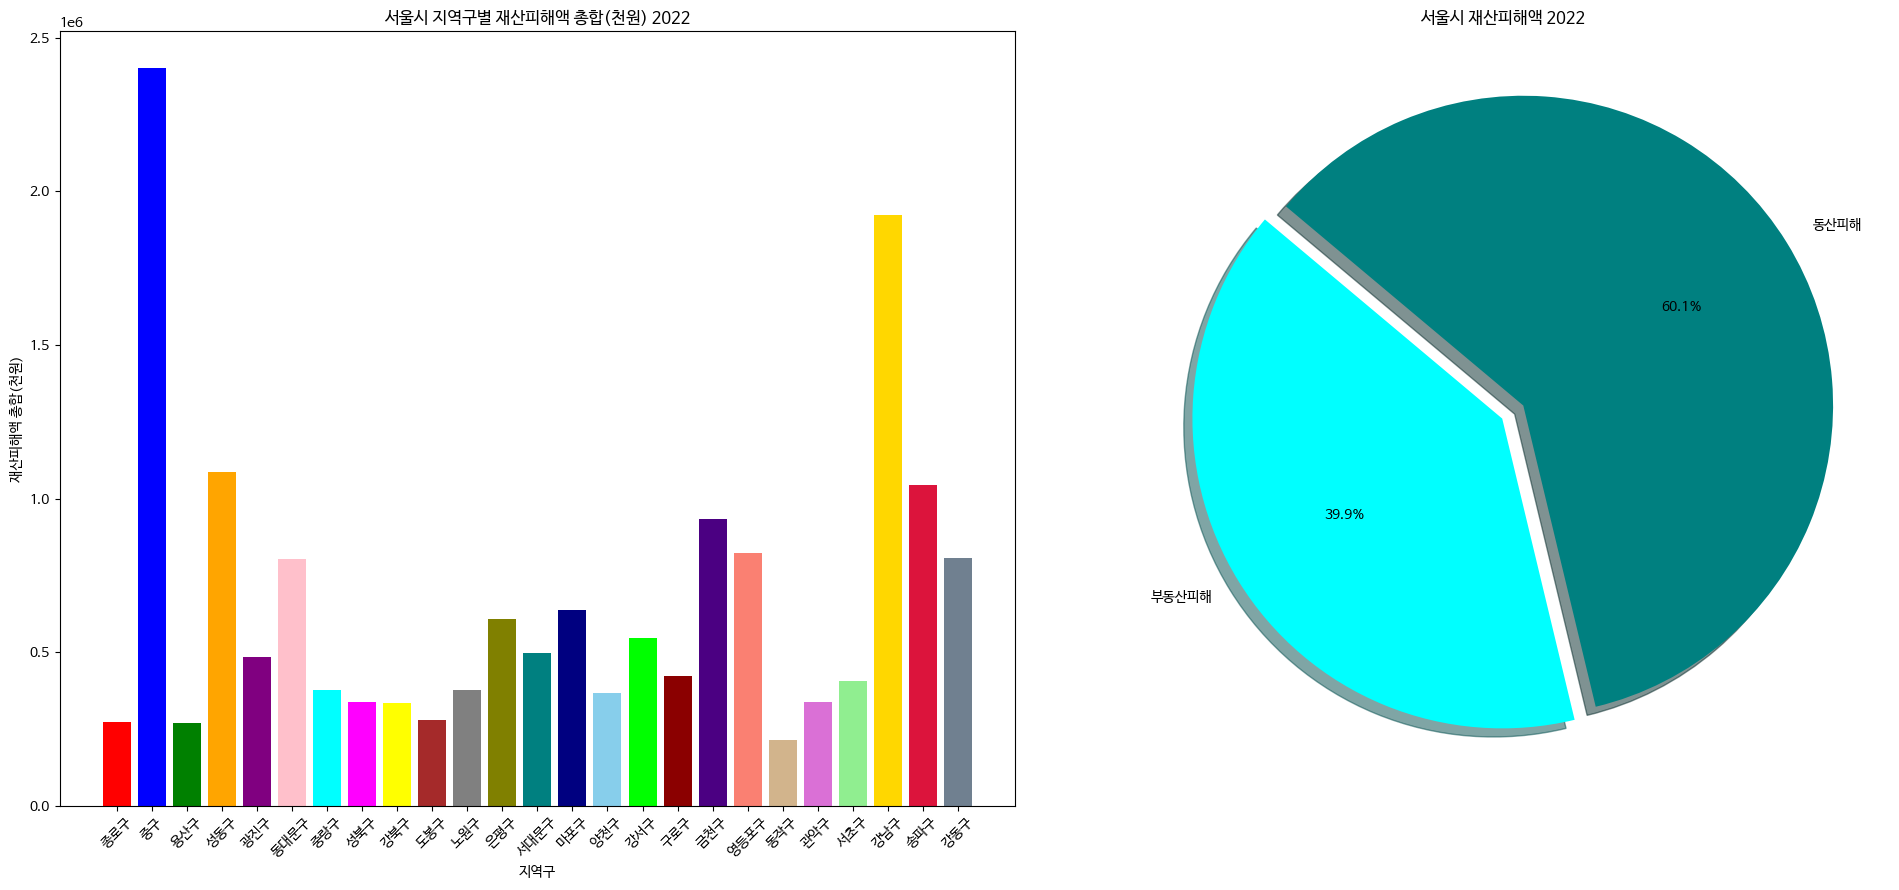

In [ ]:
# 피해액총합(천원)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#1
labels = df_new.index
values = df_new['피해액총합(천원)']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'yellow', 'brown', 'gray', 'olive', 'teal', 'navy', 'skyblue', 'lime', 'darkred', 'indigo', 'salmon', 'tan', 'orchid', 'lightgreen', 'gold', 'crimson', 'slategray']

#2
sizes = [df_new['부동산피해(천원)'].sum(),df_new['동산피해(천원)'].sum()]
labels2 = ['부동산피해','동산피해']
colors2 = ['cyan','teal']
explode = (0,0.08)

#1
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
for i, (label,value) in enumerate(zip(labels,values)):
  plt.bar(label,value,color=colors[i])
plt.title("서울시 지역구별 재산피해액 총합(천원) 2022")
plt.xlabel('지역구')
plt.ylabel('재산피해액 총합(천원)')
plt.xticks(rotation=45)

#2
plt.subplot(1,2,2)
plt.pie(sizes,labels=labels2,explode=explode,colors=colors2,autopct="%1.1f%%",startangle=140,shadow=True)
plt.title("서울시 재산피해액 2022")
plt.tight_layout()
plt.show()

In [ ]:
df_new['동산피해(천원)'].sum()

9977580

In [ ]:
df_new['부동산피해(천원)'].sum()

6614971

In [ ]:
print(df_new['피해액총합(천원)'].min(),df_new['피해액총합(천원)'].max())

214638 2401154


### 인명피해합(명)

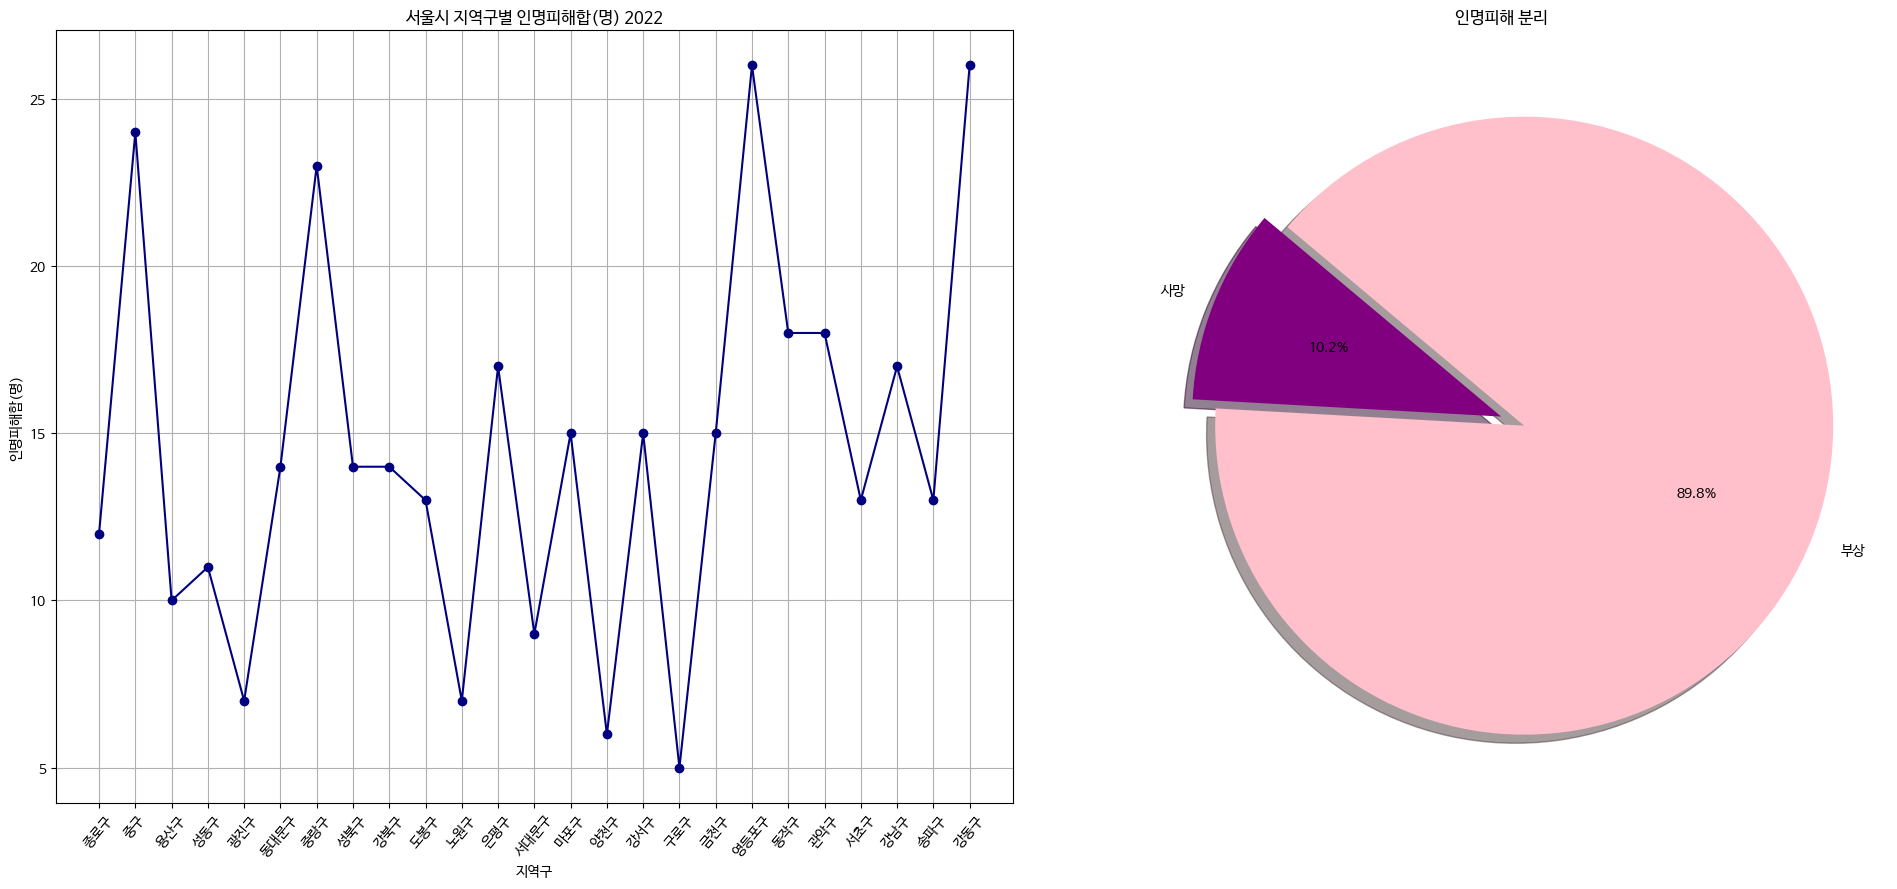

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
#1
x_values = df_new.index
y_values = df_new['인명피해합(명)']

#2
sizes = [df_new['사망총합(명)'].sum(),df_new['부상총합(명)'].sum()]
labels = ['사망','부상']
colors = ['purple', 'pink']
explode = (0,0.08)

#1
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.plot(x_values,y_values,marker='o',color='navy',linestyle='-')
plt.title('서울시 지역구별 인명피해합(명) 2022')
plt.xlabel('지역구')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=50)
plt.grid(True)

#2
plt.subplot(1,2,2)
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",startangle=140,shadow=True)
plt.title("인명피해 분리")
plt.tight_layout()
plt.show()